In [1]:
import matplotlib.pylab as plt
import numpy as np
import re
import os
import csv
import pandas as pd
import matplotlib
import copy
from rmgpy.chemkin import load_chemkin_file
%matplotlib inline

In [2]:
#experimental data


d = '/work/westgroup/nora/Code/projects/halogens/refrigerants/singles/experimental_data/experimental_data.csv'

data = dict()

with open(d,'r') as csvfile: 
    csvreader = csv.DictReader(csvfile)

    for row in csvreader:
        formula = row['formula']
        vol_frac = row['volume_frac']
        flamespeed = row['Su (cm/s)']

        if formula not in data:
            data[formula] = ([], [])  # tuple of two lists, one for volume fractions, one for flame speeds
        data[formula][0].append(vol_frac)
        data[formula][1].append(flamespeed)

fracs = []
Su = []
for tuple in data.values(): 
    fracs.append(list(map(float, tuple[0])))
    Su.append(list(map(float, tuple[1])))
    

for (volfrac,flamespeed) in zip(fracs,Su):
    print(volfrac)
    print(flamespeed)

[0.15624, 0.16492, 0.1736, 0.18228, 0.19096, 0.20832, 0.22568, 0.24304]
[5.97, 6.38, 6.56, 6.71, 6.71, 6.35, 5.7, 4.68]
[0.0734, 0.0732, 0.0787, 0.0894, 0.0948, 0.0947, 0.1005, 0.112]
[8.37, 9.43, 10.77, 12.6, 12.0, 13.2, 13.2, 12.4]
[0.0897, 0.0954, 0.0952, 0.101, 0.1066, 0.1118, 0.118, 0.12368]
[6.75, 6.44, 7.01, 6.97, 6.86, 6.43, 5.55, 5.18]
[0.0589, 0.064015, 0.0695175, 0.074555, 0.080135, 0.08556, 0.09114, 0.0969525, 0.1020675]
[15.07, 18.14, 20.62, 22.34, 23.76, 23.47, 22.74, 21.2, 17.48]
[0.06417, 0.064325, 0.069285, 0.07471, 0.074865, 0.07719, 0.07719, 0.0775, 0.0802125, 0.0803675, 0.08556, 0.0859475, 0.0910625, 0.091295, 0.096875, 0.096875, 0.1023775, 0.10292, 0.10819, 0.1140025, 0.1141575, 0.119815]
[0.882, 0.945, 1.22, 1.306, 1.188, 1.259, 1.436, 1.527, 1.416, 1.365, 1.325, 1.42, 1.459, 1.53, 1.427, 1.494, 1.454, 1.399, 1.454, 1.501, 1.571, 1.504]
[0.05828, 0.0645575, 0.070525, 0.074245, 0.077035, 0.0794375, 0.0833125, 0.089745, 0.096255, 0.10292]
[11.05, 12.82, 13.92, 14.14

In [3]:
#Siddha's improvements (thermos in original order) #107 species
vf_1 = [0.047959183673469394, 0.05255102040816327, 0.061734693877551025, 0.07091836734693878, 0.07551020408163266, 0.08010204081632655, 0.08469387755102042, 0.0892857142857143, 0.09387755102040818, 0.09846938775510206, 0.10306122448979593, 0.10765306122448981, 0.11224489795918369, 0.11683673469387756, 0.12142857142857144, 0.12602040816326532, 0.1306122448979592, 0.13520408163265307, 0.13979591836734695, 0.14438775510204083, 0.1489795918367347, 0.15357142857142858, 0.15816326530612246, 0.16275510204081634, 0.1673469387755102, 0.1719387755102041, 0.17653061224489797, 0.18112244897959184, 0.18571428571428572, 0.1903061224489796, 0.19489795918367347, 0.19948979591836735, 0.20408163265306123, 0.2086734693877551, 0.21326530612244898, 0.21785714285714286, 0.22244897959183674, 0.22704081632653061, 0.2316326530612245, 0.23622448979591837, 0.24081632653061225, 0.24540816326530615, 0.25]
fs_1 = np.array([0.005880325908737559, 0.010077226627606859, 0.02015324182315413, 0.034249008050340236, 0.04375838272261257, 0.05477138673268801, 0.06682082090411584, 0.08027706223943418, 0.09391691983997649, 0.10798258673559993, 0.1215820661894697, 0.1344469043951613, 0.14630342061771567, 0.15650726377579036, 0.16461376880632642, 0.17002836304141894, 0.17311155813619178, 0.1731451689386353, 0.169965393073179, 0.16352304475756566, 0.1541278878244592, 0.14250424966063513, 0.13005015527428387, 0.11796191565978545, 0.10655361279954345, 0.09670146965077797, 0.08828885019571832, 0.08186244523526559, 0.07751340874339413, 0.07403247189356334, 0.07094487013982492, 0.06808368231040737, 0.06542042649875694, 0.06289095679394227, 0.06051139887197341, 0.05825749755484844, 0.05613447170244451, 0.05408400580274518, 0.05214226898983077, 0.050289971346609154, 0.048539996706758785, 0.046971296747570564, 0.04537179417868349])*100


#original CH3F based on David's general input.py setup 
vf_4=[0.047959183673469394, 0.05255102040816327, 0.05714285714285715, 0.061734693877551025, 0.0663265306122449, 0.07091836734693878, 0.07551020408163266, 0.08010204081632655, 0.08469387755102042, 0.0892857142857143, 0.09387755102040818, 0.09846938775510206, 0.10306122448979593, 0.10765306122448981, 0.11224489795918369, 0.11683673469387756, 0.12142857142857144, 0.12602040816326532, 0.1306122448979592, 0.13520408163265307, 0.13979591836734695, 0.14438775510204083, 0.1489795918367347, 0.15357142857142858, 0.15816326530612246, 0.16275510204081634, 0.1673469387755102, 0.1719387755102041, 0.17653061224489797, 0.18112244897959184, 0.18571428571428572, 0.1903061224489796, 0.19489795918367347, 0.19948979591836735, 0.20408163265306123, 0.2086734693877551, 0.21326530612244898, 0.21785714285714286, 0.22244897959183674, 0.22704081632653061, 0.2316326530612245, 0.23622448979591837, 0.24081632653061225, 0.24540816326530615, 0.25]
fs_4=np.array([0.005982480617575387, 0.012411649940291467, 0.01919647167604238, 0.026518235816562877, 0.03548300233615238, 0.046048972874887024, 0.05798102487322556, 0.07140093328890722, 0.08603305209594603, 0.10077266847974249, 0.11550038832735122, 0.12996136055749283, 0.14372506041475677, 0.1563553415671815, 0.1673049604924187, 0.17664217871333426, 0.18365823374570298, 0.1884373925219242, 0.18974492057565517, 0.18852744283278666, 0.1845369631666408, 0.1766205066154939, 0.1660750847037671, 0.15332208398301786, 0.14002250421678938, 0.12710363589874285, 0.11511244433267499, 0.10443324351171797, 0.09551455540832977, 0.08894404263844273, 0.08461736944279213, 0.080958743191223, 0.0777624650316629, 0.07482897363117884, 0.07215386480935773, 0.0696357206174165, 0.06728958396624721, 0.06499411789789883, 0.06288257826192578, 0.060937512019051156, 0.059061739341414655, 0.05729544173952729, 0.05558176671397901, 0.053978091030000994, 0.052406306076994806])*100

#experimental
vf_exp=[0.0866968, 0.0919772, 0.0975032, 0.1029064, 0.1084324, 0.1137128, 0.1193616, 0.1225544, 0.1251332, 0.1310276, 0.1366764, 0.1426936, 0.1494476]
fs_exp=[15.5, 18.4, 21.3, 23.9, 26.0, 27.4, 28.6, 28.4, 28.4, 27.7, 26.1, 23.9, 20.3]

In [4]:
#flipped results 
flipped_path = '/work/westgroup/nora/Code/projects/PFAS/models/testing_Siddhas_chemistry/CH3F/flipping/data/'
flipped_csvs = [x for x in os.listdir(flipped_path) if '.csv' in x]

flipped_results=[]

for csv in flipped_csvs: 
    data = pd.read_csv(flipped_path+csv)
    flipped_index = re.search('copy_([0-9]+)',csv).group(1)
    speed=float(data['velocity'][0])*100
    flipped_results.append((flipped_index, speed))

In [5]:
for (ind, speed) in flipped_results: 
    str_speed = str(speed)
    if '18.7638' not in str_speed:
        print(ind, '\t', speed)

1320 	 18.77939193309212
238 	 18.89405779693506
239 	 18.62881122061205
240 	 16.60852554947519
241 	 18.750179444889557
243 	 18.80108065543908
244 	 18.75902467101522
247 	 18.76412400383938
255 	 18.7637176067862
260 	 18.74814852211516
295 	 18.76135887998292
316 	 18.7783885964485
325 	 18.753492370482817
328 	 18.76374948052721
342 	 18.74679642670181
362 	 18.76397730236522
363 	 18.76395384587092
388 	 18.950524162578798
389 	 18.76287636609861
390 	 18.751047134103597
391 	 18.33170639065495
412 	 18.76391387860995
522 	 18.81886222916557
525 	 18.782736494799828
526 	 18.786961562216632
527 	 18.53124807141329
528 	 18.76280692505107
533 	 18.76722687196791
540 	 18.78256476354828
561 	 18.76367562997816
567 	 18.763926708246
570 	 18.76397730888126
645 	 18.76379004667609
646 	 18.761826225755122
680 	 18.77186542146948
689 	 18.76419388481289
693 	 18.7634318973891
741 	 18.76375058160583
774 	 18.77291620243096
775 	 18.767646325556058
818 	 18.763929977919968
831 	 18.76

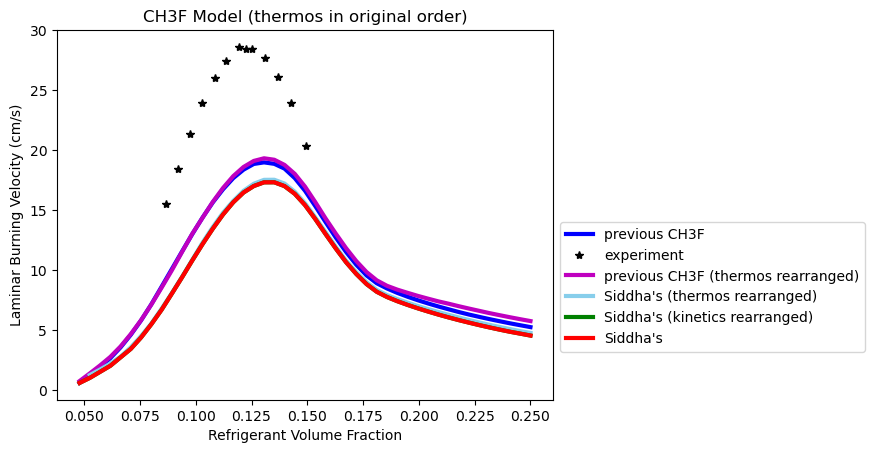

In [15]:
#thermos in original order!!!
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.plot(vf_4, fs_4, '-', c='b', label='previous CH3F',linewidth = 3 )
ax1.plot(vf_exp, fs_exp, '*', c='black', label='experiment',linewidth = 3 )
ax1.plot(vf_thermos_rearranged_94, fs_thermos_rearranged_94, '-', c='m', label='previous CH3F (thermos rearranged)',linewidth = 3 )
# ax1.plot(vf_siddhas_thermos_rearranged_99, fs_siddhas_thermos_rearranged_99, '-', c='g', label='Siddha\'s (thermos rearranged)',linewidth = 3 )
ax1.plot(vf_siddhas_thermos_rearranged_111, fs_siddhas_thermos_rearranged_111, '-', c='skyblue', label='Siddha\'s (thermos rearranged)',linewidth = 3 )
ax1.plot(kinetics_switched_vf, kinetics_switched_speeds, '-', c='g', label='Siddha\'s (kinetics rearranged)',linewidth = 3 )
ax1.plot(vf_1, fs_1, '-', c='r', label='Siddha\'s',linewidth = 3 )


plt.title('CH3F Model (thermos in original order)')
plt.xlabel('Refrigerant Volume Fraction')
plt.ylabel('Laminar Burning Velocity (cm/s)')
plt.legend(bbox_to_anchor=(1, 0., 0.5, 0.5))


In [9]:
#thermos rearranged (without siddhas additions) 94 species 
vf_thermos_rearranged_94 = [0.047959183673469394, 0.05255102040816327, 0.05714285714285715, 0.061734693877551025, 0.0663265306122449, 0.07091836734693878, 0.07551020408163266, 0.08010204081632655, 0.08469387755102042, 0.0892857142857143, 0.09387755102040818, 0.09846938775510206, 0.10306122448979593, 0.10765306122448981, 0.11224489795918369, 0.11683673469387756, 0.12142857142857144, 0.12602040816326532, 0.1306122448979592, 0.13520408163265307, 0.13979591836734695, 0.14438775510204083, 0.1489795918367347, 0.15357142857142858, 0.15816326530612246, 0.16275510204081634, 0.1673469387755102, 0.1719387755102041, 0.17653061224489797, 0.18112244897959184, 0.18571428571428572, 0.1903061224489796, 0.19489795918367347, 0.19948979591836735, 0.20408163265306123, 0.2086734693877551, 0.21326530612244898, 0.21785714285714286, 0.22244897959183674, 0.22704081632653061, 0.2316326530612245, 0.23622448979591837, 0.24081632653061225, 0.24540816326530615, 0.25]
fs_thermos_rearranged_94 = 100*np.array([0.0074359608377462414, 0.013838366049679423, 0.02046068102529353, 0.027579255952182333, 0.0362892543111905, 0.046618340324697354, 0.05820515608595744, 0.07119132494445139, 0.08525052695099233, 0.09970890251284718, 0.11509372452157737, 0.1302530856425097, 0.14357363650194185, 0.15680225019152375, 0.1684367591376987, 0.17832230031308813, 0.18591830473483578, 0.1909560390848837, 0.1931510959582435, 0.19194212339060188, 0.18763292866285236, 0.18015688354486267, 0.16953159422955674, 0.15662322743715, 0.1430848395638043, 0.13035695251679277, 0.11829421721090905, 0.10747231207139868, 0.09833983869681494, 0.0914038282714678, 0.08684181455752268, 0.08366312227031009, 0.08100378435854094, 0.07845678688578235, 0.07612890506022882, 0.0738816615564325, 0.07193670916283652, 0.06984171877021109, 0.06786266309853524, 0.06596430359393188, 0.06406659938886303, 0.062326189290060015, 0.06062569688895837, 0.05899657156196523, 0.0574384295012384])

#thermos rearranged (without siddhas additions) 114 species
#check data folder, these aren't very different from the 94 species speeds, didnt bother graphing

#thermo rearranged (with siddhas addition) 111 species
vf_siddhas_thermos_rearranged_111 = [0.05255102040816327, 0.05714285714285715, 0.061734693877551025, 0.0663265306122449, 0.07091836734693878, 0.07551020408163266, 0.08010204081632655, 0.08469387755102042, 0.0892857142857143, 0.09387755102040818, 0.09846938775510206, 0.10306122448979593, 0.10765306122448981, 0.11224489795918369, 0.11683673469387756, 0.12142857142857144, 0.12602040816326532, 0.1306122448979592, 0.13520408163265307, 0.13979591836734695, 0.14438775510204083, 0.1489795918367347, 0.15357142857142858, 0.15816326530612246, 0.16275510204081634, 0.1673469387755102, 0.1719387755102041, 0.17653061224489797, 0.18112244897959184, 0.18571428571428572, 0.1903061224489796, 0.19489795918367347, 0.19948979591836735, 0.20408163265306123, 0.2086734693877551, 0.21326530612244898, 0.21785714285714286, 0.22244897959183674, 0.22704081632653061, 0.2316326530612245, 0.23622448979591837, 0.24081632653061225, 0.24540816326530615, 0.25]
fs_siddhas_thermos_rearranged_111 = 100*np.array([0.012459004385542887, 0.01702530818960035, 0.022058436852427338, 0.027866980040692418, 0.035588882201389234, 0.04498152659167924, 0.055414518736195864, 0.06777604038039833, 0.08081110144788026, 0.0943900425504546, 0.10863010073095869, 0.12290018838800024, 0.1358636873409047, 0.1478094963940592, 0.15768432138034388, 0.1660451542783441, 0.17193343775342326, 0.17517835823097938, 0.1752549222229506, 0.1720899402794258, 0.16525403375640685, 0.15570204941779694, 0.14397696997851311, 0.13166329779025862, 0.11944291885473188, 0.10794099129448838, 0.09818571654857405, 0.08983820491603121, 0.0834453970184041, 0.07912210628784662, 0.07581849868159113, 0.0728327410382641, 0.07003692509355312, 0.06745304234879416, 0.06503391441074048, 0.06266858757548725, 0.06045428098409895, 0.058312541753329485, 0.05629067907151762, 0.05431101285354438, 0.05252785268990902, 0.05076772543386177, 0.0490837631419208, 0.04755893042011756])

#thermos rearranged (with siddhas additions) 99 species 
vf_siddhas_thermos_rearranged_99 =[0.05255102040816327, 0.05714285714285715, 0.061734693877551025, 0.0663265306122449, 0.07091836734693878, 0.07551020408163266, 0.08010204081632655, 0.08469387755102042, 0.0892857142857143, 0.09387755102040818, 0.09846938775510206, 0.10306122448979593, 0.10765306122448981, 0.11224489795918369, 0.11683673469387756, 0.12142857142857144, 0.12602040816326532, 0.1306122448979592, 0.13520408163265307, 0.13979591836734695, 0.14438775510204083, 0.1489795918367347, 0.15357142857142858, 0.15816326530612246, 0.16275510204081634, 0.1673469387755102, 0.1719387755102041, 0.17653061224489797, 0.18112244897959184, 0.18571428571428572, 0.1903061224489796, 0.19489795918367347, 0.19948979591836735, 0.20408163265306123, 0.2086734693877551, 0.21326530612244898, 0.21785714285714286, 0.22244897959183674, 0.22704081632653061, 0.2316326530612245, 0.23622448979591837, 0.24081632653061225, 0.24540816326530615, 0.25]
fs_siddhas_thermos_rearranged_99 =100*np.array([0.012331297781934319, 0.01688938610471366, 0.02195166652987459, 0.02780100667935603, 0.03552570161889976, 0.0449280614679112, 0.05533827242785352, 0.06769786052863783, 0.0807177713856505, 0.09427232118428755, 0.10848564029364544, 0.12272410159379765, 0.13562688037503978, 0.1475626028583254, 0.15739365049778484, 0.16566149635182875, 0.17155514951176706, 0.17474665830594505, 0.17476553625366906, 0.17155293338972138, 0.1646709498280876, 0.15508018205494073, 0.14331733927761867, 0.13095300340606456, 0.1185588252295756, 0.10705155849605018, 0.09719431576340608, 0.0887211611196803, 0.08238541375839538, 0.07798578406315591, 0.07459850426973594, 0.07155217111564083, 0.06876043710264329, 0.06615886028390373, 0.06376476648241722, 0.061429940149298715, 0.05923616816559772, 0.05712922955141533, 0.055116850976100175, 0.05318529556319561, 0.051407831035517514, 0.049664521007542914, 0.04801893909624488, 0.04647212337638069])

#siddhas halogen_pdep and fluoromethane flipped
csv_path = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddhas_halogen_pdep_fluoromethane_switched/data/'
list_of_csvs = [file for file in os.listdir(csv_path) if 'csv' in file]
kinetics_switched_speeds=[]
kinetics_switched_vf=[]
for file in list_of_csvs:
    data=pd.read_csv(csv_path+file)
    vf = float(re.search('([0-9]\.[0-9]+)_',file).group(1))
    speed = data['velocity'][0]
    kinetics_switched_speeds.append(speed*100)
    kinetics_switched_vf.append(vf)


## Compare species between model with Siddhas additions and previous CH3F model 

In [16]:
#full path
full_path = '/work/westgroup/nora/Code/'

#Siddha's improvements (thermos in original order) #107 species
siddhas_chmkn = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddha_thermos_original_order/chemkin/chem_annotated.inp'
siddhas_transport = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddha_thermos_original_order/chemkin/tran.dat'
siddhas_species = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddha_thermos_original_order/chemkin/species_dictionary.txt'

#original CH3F based on David's general input.py setup 
CH3F_chmkn = full_path + 'projects/halogens/refrigerants/blends/redos_for_march_conference/singles/CH3F/chemkin/chem_annotated.inp'
CH3F_transport = full_path + 'projects/halogens/refrigerants/blends/redos_for_march_conference/singles/CH3F/chemkin/tran.dat'
CH3F_species = full_path + 'projects/halogens/refrigerants/blends/redos_for_march_conference/singles/CH3F/chemkin/species_dictionary.txt'

#thermos rearranged #114 species 

thermos_rearranged_chmkn = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/thermos_rearranged/3rd_try/chemkin/chem_annotated.inp'
thermos_rearranged_transport = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/thermos_rearranged/3rd_try/chemkin/tran.dat'
thermos_rearranged_species = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/thermos_rearranged/3rd_try/chemkin/species_dictionary.txt'

#siddhas with thermo orders rearranged #111 species
siddhas_thermos_rearranged_chmkn = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddha_thermos_rearranged/4th_try/chemkin/chem_annotated.inp'
siddhas_thermos_rearranged_transport = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddha_thermos_rearranged/4th_try/chemkin/tran.dat'
siddhas_thermos_rearranged_species = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddha_thermos_rearranged/4th_try/chemkin/species_dictionary.txt'

#siddhas with kinetic orders switched 
siddhas_kinetics_rearranged_chmkn = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddhas_halogen_pdep_fluoromethane_switched/chemkin/chem_annotated.inp'
siddhas_kinetics_rearranged_transport = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddhas_halogen_pdep_fluoromethane_switched/chemkin/tran.dat'
siddhas_kinetics_rearranged_species = full_path + 'projects/PFAS/models/testing_Siddhas_chemistry/CH3F/Siddhas_halogen_pdep_fluoromethane_switched/chemkin/species_dictionary.txt'

In [19]:
#load siddas
species_siddhas, reactions_siddhas = load_chemkin_file(siddhas_chmkn, dictionary_path=siddhas_species, transport_path=siddhas_transport)

#load previous CH3F
species_CH3F, reactions_CH3F = load_chemkin_file(CH3F_chmkn, dictionary_path=CH3F_species, transport_path=CH3F_transport)

#load thermos rearranged 
species_thermos_rearranged, reactions_thermos_rearranged = load_chemkin_file(thermos_rearranged_chmkn, dictionary_path=thermos_rearranged_species, transport_path=thermos_rearranged_transport)

#load siddhas with thermo rearranged
species_siddhas_thermos_rearranged, reactions_siddhas_thermos_rearranged = load_chemkin_file(siddhas_thermos_rearranged_chmkn, dictionary_path=siddhas_thermos_rearranged_species, transport_path=siddhas_thermos_rearranged_transport)

#load siddhas kinetic orders switched 
species_siddhas_kinetics_rearranged, reactions_siddhas_kinetics_rearranged = load_chemkin_file(siddhas_kinetics_rearranged_chmkn, dictionary_path=siddhas_kinetics_rearranged_species, transport_path=siddhas_kinetics_rearranged_transport)

# comparison of siddhas additions with kinetic orders switches and siddhas additions  

In [18]:
#comparison of siddhas additions with kinetic orders switches and siddhas additions  
model_1_species_list=species_siddhas
model_2_species_list=species_siddhas_kinetics_rearranged
model_1_reactions= reactions_siddhas
model_2_reactions= reactions_siddhas_kinetics_rearranged


similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_siddhas, unique_reactions_siddhas_kinetic_order = compare_rxns(model_1_reactions, model_2_reactions)
common_species, unique_species_siddhas, unique_species_siddhas_kinetic_order = compare_species(model_1_species_list, model_2_species_list)

2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
3
3
3
mismatch
3
3
3
mismatch
3
mismatch
3
mismatch
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
3
3
3
mismatch
2
2
mismatch
3
3
3
mismatch
2
mismatch
2
3
mismatch
3
mismatch
3
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
2
2
mismatch
2
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
2
2
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
2
mismatch
2
2
mismatch
2
2
mismatch
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [105]:
#comparison of siddhas additions with kinetic orders switches and previous CH3F
model_1_species_list=species_CH3F
model_2_species_list=species_siddhas_kinetics_rearranged
model_1_reactions= reactions_CH3F
model_2_reactions= reactions_siddhas_kinetics_rearranged


similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_previous, unique_reactions_siddhas_kinetic_order = compare_rxns(model_1_reactions, model_2_reactions)
common_species, unique_species_previous, unique_species_siddhas_kinetic_order = compare_species(model_1_species_list, model_2_species_list)

2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
2
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
3
3
3
mismatch
3
3
3
mismatch
3
mismatch
3
mismatch
3
4
4
4
4
4
4
4
4
2
2
mismatch
4
4
4
4
4
4
4
4
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
3
3
3
mismatch
2
2
mismatch
3
3
3
mismatch
2
mismatch
2
3
mismatch
3
mismatch
3
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
2
2
mismatch
2
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
2
2
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
mismatch
2
2
2
2
2
2
2
2
2
2
mismatch
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2

In [54]:
#comparison of previous CH3F with thermos rearranged and previous CH3F  
model_1_species_list=species_CH3F
model_2_species_list=species_thermos_rearranged
model_1_reactions= reactions_CH3F
model_2_reactions= reactions_thermos_rearranged

similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_previous, unique_reactions_thermos_rearranged = compare_rxns(model_1_reactions, model_2_reactions)
common_species, unique_species_previous, unique_species_thermos_rearranged = compare_species(model_1_species_list, model_2_species_list)

2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
2
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
3
3
3
mismatch
3
3
3
mismatch
3
mismatch
3
mismatch
3
2
mismatch
2
2
mismatch
2
2
mismatch
2
3
3
3
mismatch
2
2
mismatch
3
3
3
mismatch
2
mismatch
2
3
mismatch
3
mismatch
3
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
2
2
mismatch
2
2
2
2
mismatch
2
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
2
2
2
2
mismatch
2
2
2
2
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
mismatch
2
2
2

In [20]:
#comparison of siddhas additions (with original thermo order) and previous CH3F model 
model_1_species_list=species_siddhas
model_2_species_list=species_CH3F
model_1_reactions= reactions_siddhas
model_2_reactions= reactions_CH3F


similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_siddhas, unique_reactions_previous = compare_rxns(model_1_reactions, model_2_reactions)
common_species, unique_species_siddhas, unique_species_previous = compare_species(model_1_species_list, model_2_species_list)

4
4
4
4
4
4
4
4
2
2
2
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
2
4
4
4
4
4
4
4
4
2
2
2
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
2
2
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
2
2
2
2
2
mismatch
2
2
mismatch
3
3
3
3
3
3
3
3
3
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
2
mismatch
2
mismatch
2
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
mismatch
3
3
3
mismatch
2
2
mismatch
3
3
3
mismatch
2
mismatch
2
2
2
2
2
3
mismatch
3
mismatch
3
2
2
2
2
mismatch
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
mismatch
2
mismatch
2
2
mismatch
2
2
mismatch
2
2
2
2
2
2
2
mismatch
2
2
mismatch
2
2
2
2
2
mismatch
2
2
2
mismatch
2
mismatch


## analyze the families

In [21]:
master_list_siddhas = []

for i in reactions_siddhas: 
    try: 
        master_list_siddhas.append(str(i.family))
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_siddhas.append(str('PDepReaction'))
            

In [22]:
set(master_list_siddhas)

{'CO_Disproportionation',
 'Disproportionation',
 'Disproportionation-Y',
 'FFCM1(-)',
 'F_Abstraction',
 'Fluoromethane',
 'H_Abstraction',
 'PDepReaction',
 'R_Addition_COm',
 'R_Addition_MultipleBond',
 'R_Recombination',
 'halocarbene_recombination',
 'halogens_pdep',
 'intra_H_migration',
 'intra_OH_migration'}

In [23]:
siddhas_dictionary = {'CO_Disproportionation':0,
 'Disproportionation':0,
 'Disproportionation-Y':0,
 'FFCM1(-)':0,
 'F_Abstraction':0,
 'Fluoromethane':0,
 'H_Abstraction':0,
 'PDepReaction':0,
 'R_Addition_COm':0,
 'R_Addition_MultipleBond':0,
 'R_Recombination':0,
 'halocarbene_recombination':0,
 'halogens_pdep':0,
 'intra_H_migration':0,
 'intra_OH_migration':0}


for i in reactions_siddhas: 
    try: 
        str(i.family)
        siddhas_dictionary[str(i.family)]=siddhas_dictionary[str(i.family)]+1
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            siddhas_dictionary['PDepReaction']=siddhas_dictionary['PDepReaction']+1

In [24]:
siddhas_dictionary 

{'CO_Disproportionation': 45,
 'Disproportionation': 437,
 'Disproportionation-Y': 172,
 'FFCM1(-)': 175,
 'F_Abstraction': 88,
 'Fluoromethane': 56,
 'H_Abstraction': 166,
 'PDepReaction': 963,
 'R_Addition_COm': 1,
 'R_Addition_MultipleBond': 2,
 'R_Recombination': 2,
 'halocarbene_recombination': 1,
 'halogens_pdep': 15,
 'intra_H_migration': 1,
 'intra_OH_migration': 2}

In [25]:
total=0
for v in siddhas_dictionary.values():
    total+=v
total

2126

In [43]:
master_list_previous = []

for i in reactions_CH3F: 
    try: 
        master_list_previous.append(str(i.family))
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_previous.append(str('PDepReaction'))

In [44]:
set(master_list_previous)

{'Birad_R_Recombination',
 'CO_Disproportionation',
 'Disproportionation',
 'Disproportionation-Y',
 'FFCM1(-)',
 'F_Abstraction',
 'H_Abstraction',
 'PDepReaction',
 'R_Recombination',
 'halocarbene_recombination',
 'halogens_pdep'}

In [45]:
previous_dictionary = {'Birad_R_Recombination':0,
 'CO_Disproportionation':0,
 'Disproportionation':0,
 'Disproportionation-Y':0,
 'FFCM1(-)':0,
 'F_Abstraction':0,
 'H_Abstraction':0,
 'PDepReaction':0,
 'R_Recombination':0,
 'halocarbene_recombination':0,
 'halogens_pdep':0}


for i in reactions_CH3F: 
    try: 
        str(i.family)
        previous_dictionary[str(i.family)]=previous_dictionary[str(i.family)]+1
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            previous_dictionary['PDepReaction']=previous_dictionary['PDepReaction']+1

In [46]:
previous_dictionary

{'Birad_R_Recombination': 1,
 'CO_Disproportionation': 41,
 'Disproportionation': 311,
 'Disproportionation-Y': 98,
 'FFCM1(-)': 236,
 'F_Abstraction': 78,
 'H_Abstraction': 150,
 'PDepReaction': 509,
 'R_Recombination': 1,
 'halocarbene_recombination': 1,
 'halogens_pdep': 14}

In [47]:
master_list_thermos_rearranged = []

for i in reactions_thermos_rearranged: 
    try: 
        master_list_thermos_rearranged.append(str(i.family))
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_thermos_rearranged.append(str('PDepReaction'))


In [48]:
set(master_list_thermos_rearranged)

{'CO_Disproportionation',
 'Disproportionation',
 'Disproportionation-Y',
 'FFCM1(-)',
 'F_Abstraction',
 'H_Abstraction',
 'PDepReaction',
 'R_Addition_COm',
 'R_Addition_MultipleBond',
 'R_Recombination',
 'halocarbene_recombination',
 'halogens_pdep',
 'intra_OH_migration'}

In [49]:
thermos_rearranged_dictionary = {'CO_Disproportionation':0,
 'Disproportionation':0,
 'Disproportionation-Y':0,
 'FFCM1(-)':0,
 'F_Abstraction':0,
 'H_Abstraction':0,
 'PDepReaction':0,
 'R_Addition_COm':0,
 'R_Addition_MultipleBond':0,
 'R_Recombination':0,
 'halocarbene_recombination':0,
 'halogens_pdep':0,
 'intra_OH_migration':0}


for i in reactions_thermos_rearranged: 
    try: 
        str(i.family)
        thermos_rearranged_dictionary[str(i.family)]=thermos_rearranged_dictionary[str(i.family)]+1
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            thermos_rearranged_dictionary['PDepReaction']=thermos_rearranged_dictionary['PDepReaction']+1

In [50]:
thermos_rearranged_dictionary

{'CO_Disproportionation': 47,
 'Disproportionation': 435,
 'Disproportionation-Y': 129,
 'FFCM1(-)': 169,
 'F_Abstraction': 105,
 'H_Abstraction': 191,
 'PDepReaction': 1091,
 'R_Addition_COm': 1,
 'R_Addition_MultipleBond': 1,
 'R_Recombination': 3,
 'halocarbene_recombination': 1,
 'halogens_pdep': 14,
 'intra_OH_migration': 1}

In [59]:
len(different_kinetics_reactions)

#similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_previous, unique_reactions_thermos_rearranged

296

## Analyze the families

In [22]:
master_list_siddhas = []

for i in unique_reactions_siddhas: 
    try: 
        master_list_siddhas.append(str(i.family))
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_siddhas.append(str('PDepReaction'))


In [66]:
set(master_list_siddhas)

{'CO_Disproportionation',
 'Disproportionation',
 'Disproportionation-Y',
 'F_Abstraction',
 'Fluoromethane',
 'H_Abstraction',
 'PDepReaction',
 'R_Addition_COm',
 'R_Addition_MultipleBond',
 'R_Recombination',
 'halocarbene_recombination',
 'halogens_pdep',
 'intra_H_migration',
 'intra_OH_migration'}

In [43]:
master_list_siddhas = []

for i in reactions_siddhas: 
    try: 
        master_list_siddhas.append(str(i.family))
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_siddhas.append(str('PDepReaction'))


In [55]:
set(master_list_siddhas).difference(set(master_list_CH3F))

{'Fluoromethane',
 'R_Addition_COm',
 'R_Addition_MultipleBond',
 'intra_H_migration',
 'intra_OH_migration'}

In [48]:
set(master_list_CH3F)

{'Birad_R_Recombination',
 'CO_Disproportionation',
 'Disproportionation',
 'Disproportionation-Y',
 'FFCM1(-)',
 'F_Abstraction',
 'H_Abstraction',
 'PDepReaction',
 'R_Recombination',
 'halocarbene_recombination',
 'halogens_pdep'}

In [81]:
previous_dictionary = {'Birad_R_Recombination': 0,
 'CO_Disproportionation': 0,
 'Disproportionation': 0,
 'Disproportionation-Y': 0,
 'FFCM1(-)': 0,
 'F_Abstraction': 0,
 'H_Abstraction': 0,
 'PDepReaction': 0,
 'R_Recombination': 0,
 'halocarbene_recombination': 0,
 'halogens_pdep': 0}

for i in unique_reactions_previous: 
    try: 
        str(i.family)
        previous_dictionary[str(i.family)]=previous_dictionary[str(i.family)]+1
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            previous_dictionary['PDepReaction']=previous_dictionary['PDepReaction']+1

In [82]:
previous_dictionary

{'Birad_R_Recombination': 1,
 'CO_Disproportionation': 9,
 'Disproportionation': 87,
 'Disproportionation-Y': 9,
 'FFCM1(-)': 61,
 'F_Abstraction': 10,
 'H_Abstraction': 29,
 'PDepReaction': 67,
 'R_Recombination': 1,
 'halocarbene_recombination': 1,
 'halogens_pdep': 1}

In [67]:
siddhas_dictionary = {'CO_Disproportionation': 0,
 'Disproportionation': 0, 
 'Disproportionation-Y': 0,
 'FFCM1(-)': 0,
 'F_Abstraction': 0,
 'Fluoromethane': 0,
 'H_Abstraction': 0,
 'PDepReaction': 0,
 'R_Addition_COm': 0,
 'R_Addition_MultipleBond': 0,
 'R_Recombination': 0,
 'halocarbene_recombination': 0,
 'halogens_pdep': 0,
 'intra_H_migration': 0,
 'intra_OH_migration': 0}

for i in unique_reactions_siddhas: 
    try: 
        str(i.family)
        siddhas_dictionary[str(i.family)]=siddhas_dictionary[str(i.family)]+1
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            siddhas_dictionary['PDepReaction']=siddhas_dictionary['PDepReaction']+1

In [74]:
total=0
for i in siddhas_dictionary.values():
    total=total+i
total

962

In [75]:
siddhas_dictionary

{'CO_Disproportionation': 13,
 'Disproportionation': 213,
 'Disproportionation-Y': 83,
 'FFCM1(-)': 0,
 'F_Abstraction': 38,
 'Fluoromethane': 13,
 'H_Abstraction': 70,
 'PDepReaction': 521,
 'R_Addition_COm': 1,
 'R_Addition_MultipleBond': 2,
 'R_Recombination': 2,
 'halocarbene_recombination': 1,
 'halogens_pdep': 2,
 'intra_H_migration': 1,
 'intra_OH_migration': 2}

In [79]:
total=0
for i in previous_dictionary.values():
    total=total+i
    
total

276

In [ ]:
similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_previous, unique_reactions_siddhas_kinetic_order = compare_rxns(model_1_reactions, model_2_reactions)
common_species, unique_species_previous, unique_species_siddhas_kinetic_order 

In [90]:
master_list_siddhas_kinetics_switch = []

for i in reactions_siddhas_kinetics_rearranged: 
    try: 
        master_list_siddhas_kinetics_switch.append(str(i.family))
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_siddhas_kinetics_switch.append(str('PDepReaction'))


In [91]:
set(master_list_siddhas_kinetics_switch)

{'CO_Disproportionation',
 'Disproportionation',
 'Disproportionation-Y',
 'FFCM1(-)',
 'F_Abstraction',
 'Fluoromethane',
 'H_Abstraction',
 'PDepReaction',
 'R_Addition_COm',
 'R_Addition_MultipleBond',
 'R_Recombination',
 'halocarbene_recombination',
 'halogens_pdep',
 'intra_H_migration',
 'intra_OH_migration'}

In [94]:
master_list_siddhas_kinetics_switch_dictionary={'CO_Disproportionation':0,
 'Disproportionation':0,
 'Disproportionation-Y':0,
 'FFCM1(-)':0,
 'F_Abstraction':0,
 'Fluoromethane':0,
 'H_Abstraction':0,
 'PDepReaction':0,
 'R_Addition_COm':0,
 'R_Addition_MultipleBond':0,
 'R_Recombination':0,
 'halocarbene_recombination':0,
 'halogens_pdep':0,
 'intra_H_migration':0,
 'intra_OH_migration':0}


for i in reactions_siddhas_kinetics_rearranged:
    try: 
        str(i.family)
        master_list_siddhas_kinetics_switch_dictionary[str(i.family)]=master_list_siddhas_kinetics_switch_dictionary[str(i.family)]+1
    except AttributeError as e: 
        if 'PDepReaction' in str(e):
            master_list_siddhas_kinetics_switch_dictionary['PDepReaction']=master_list_siddhas_kinetics_switch_dictionary['PDepReaction']+1

In [95]:
master_list_siddhas_kinetics_switch_dictionary

{'CO_Disproportionation': 45,
 'Disproportionation': 437,
 'Disproportionation-Y': 172,
 'FFCM1(-)': 175,
 'F_Abstraction': 88,
 'Fluoromethane': 56,
 'H_Abstraction': 166,
 'PDepReaction': 963,
 'R_Addition_COm': 1,
 'R_Addition_MultipleBond': 2,
 'R_Recombination': 2,
 'halocarbene_recombination': 1,
 'halogens_pdep': 15,
 'intra_H_migration': 1,
 'intra_OH_migration': 2}

## Are these common reactions correct?

In [26]:
len(common_species), len(common_reactions)

(74, 1229)

In [27]:
common_reactions_duplicates_combined = 0
common_reactions_duplicates_indices = []
common_reactions_not_duplicate = 0
for i, j in common_reactions: 
    if i.duplicate==True: #and j.duplicate==True:
        if i.index not in common_reactions_duplicates_indices:
            common_reactions_duplicates_indices.append(i.index)
            common_reactions_duplicates_combined+=1  
    # if i.duplicate==True and j.duplicate==False: 
    #     print('sadness 1')
    if i.duplicate==False and j.duplicate==True: 
        common_reactions_not_duplicate+=1
    if i.duplicate==False and j.duplicate==False:
        common_reactions_not_duplicate+=1
        
total = common_reactions_duplicates_combined + common_reactions_not_duplicate
print(total)


# this gets me 1169 common reactions, which is what sevys flipping script predicts. Basically: 

# my script predicts 1229 common reactions. This is because:

# model 1         model 2

# dup_rxn_1a      dup_rxn_2a
# dup_rxn_1b      dup_rxn_2b


# my common reactions list will list this as: 

# [dup_rxn_1a dup_rxn_2a]
# [dup_rxn_1a dup_rxn_2b]
# [dup_rxn_1b dup_rxn_2a]
# [dup_rxn_1b dup_rxn_2b]

# Moving forward, I need to group all the duplicates of each model and just flip them in chunks. 


1169


In [28]:
total = 0
for i,j in common_reactions:
    
    if j.kinetics.is_identical_to(i.kinetics)==True:
        # print(i.index, j.index)
        # print('\n')
        # print(i, '\t', j)
        #print(i.kinetics, j.kinetics)
        total+=1
total

857

In [29]:

model_1_species_list=species_siddhas
model_2_species_list=species_CH3F
model_1_reactions= reactions_siddhas
model_2_reactions= reactions_CH3F

In [30]:
to_remove = []
for reactionList in (model_1_reactions, model_2_reactions):
    for reaction in reactionList:
        for side in (reaction.products, reaction.reactants):
            for species in side:
                if not species.molecule:
                    to_remove.append((reactionList, reaction))
                    print("Removing reaction {!r} that had unidentified species {!r}".format(reaction, species))
                    break
if len(to_remove)!=0:
    for reactionList, reaction in to_remove:
        reactionList.remove(reaction)
    print(f'Following reactions removed because they have unknown species: {to_remove}')
    
#find the common reactions and the unique reactions
common_reactions = []
common_reactions_equations = []
unique_reactions_1 = []
unique_reactions_2 = []
copy_of_model_1_reactions = model_1_reactions.copy() #list 1
copy_of_model_2_reactions = model_2_reactions.copy() #list 2

#lets chunk together the dups of each model
model_1_reactions_dups_recognized = [] #will be a list of lists. Each list inside will have either 1 rxn (if no dup) or multiple if there are dups
model_2_reactions_dups_recognized = [] #same as above

#need to chunk together reactions in model 1 
for reaction in copy_of_model_1_reactions: 
    was_a_dup=False
    #go through all the lists of rxns
    for list_of_rxns in model_1_reactions_dups_recognized: 
        #just need to check the first one
        if list_of_rxns[0].is_isomorphic(reaction):
            list_of_rxns.append(reaction) 
            #print('was a dup')
            was_a_dup=True
            
    if was_a_dup==False:
        #print('not a dup')
        model_1_reactions_dups_recognized.append([reaction])
        
count_1=0
for i in model_1_reactions_dups_recognized: 
    if len(i)>1:
        for x in i:
            #print(x)
            count_1+=1
        #print('\n')
        
    if len(i)==1: 
        #print(i[0])
        # print('\n')
        count_1+=1
        
#did we get all the reactions in model 1?
assert count_1==len(model_1_reactions), "You did not catch all the reactions in model 1!"


#need to chunk together reactions in model 2 
for reaction in copy_of_model_2_reactions: 
    was_a_dup=False
    #go through all the lists of rxns
    for list_of_rxns in model_2_reactions_dups_recognized: 
        #just need to check the first one
        if list_of_rxns[0].is_isomorphic(reaction):
            list_of_rxns.append(reaction) 
            was_a_dup=True
            
    if was_a_dup==False:
        model_2_reactions_dups_recognized.append([reaction])
        
count_2=0
for i in model_2_reactions_dups_recognized: 
    if len(i)>1:
        for x in i:
            #print(x)
            count_2+=1
        #print('\n')
        
    if len(i)==1: 
        #print(i[0])
        # print('\n')
        count_2+=1
        
#did we get all the reactions in model 2?
assert count_2==len(model_2_reactions), "You did not catch all the reactions in model 2!"


#now let's find the common reactions: 
common_reactions_with_dups_grouped = []

for rxn_list_2 in model_2_reactions_dups_recognized:
        rxn_2 = rxn_list_2[0]
        
        for rxn_list_1 in model_1_reactions_dups_recognized: # make a copy so you don't remove from the list you are iterating over
            rxn_1 = rxn_list_1[0]
            
            if rxn_2.is_isomorphic(rxn_1):
                common_reactions_with_dups_grouped.append((rxn_list_1, rxn_list_2)) 

print(f'Here is the actual number of common reactions (with duplicate reactions grouped): {len(common_reactions_with_dups_grouped)}')

Here is the actual number of common reactions (with duplicate reactions grouped): 1093


In [73]:
for i, j in common_reactions_with_dups_grouped: 
    #print('\n')
    if len(i)!=1 or len(j)!=1: 
        print(len(i),len(j))
        if len(i)==len(j):
            for x,y in zip(i,j):
                print(x,y)
                print(x.kinetics,y.kinetics)
                print('\n')
        

4 4
CH2(T)(18) + CH3F(1) <=> CH2F(37) + CH3(19) CH2(T)(18) + CH3F(1) <=> CH2F(45) + CH3(19)
Arrhenius(A=(0.708135,'cm^3/(mol*s)'), n=3.838, Ea=(38.127,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_N-1R->O_N-3R->O_N-1BrCClFHINPSSi->F_N-3CClFH->H_3CClF->C_1CClH->C""") Arrhenius(A=(0.708135,'cm^3/(mol*s)'), n=3.838, Ea=(38.127,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_N-1R->O_N-3R->O_N-1BrCClFHINPSSi->F_N-3CClFH->H_3CClF->C_1CClH->C""")


CH2(T)(18) + CH3F(1) <=> CH2F(37) + CH3(19) CH2(T)(18) + CH3F(1) <=> CH2F(45) + CH3(19)
Arrhenius(A=(0.00025499,'cm^3/(mol*s)'), n=5.168, Ea=(6.057,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_N-3R->F_3BrCClHINOS->C_N-1R-u2_N-1R->F_N-3C-inRing_N-1BrCClHINOPSSi->I_N-1BrCClHNO->Br_N-1CClHNO->Cl_Ext-1CHNO-R_N- Sp-4R!H=1CCHHNNOO_Sp-4R!H-1CHNO_N-4R!H->Cl_4BrCFNOS-u0_N-1CHNO->N_N-4BrCFNOS->S_N-4BrCFNO->Br_N-4CFNO-inRing_N-4CFNO->N_1CO->C_4CFO->F
Multiplied by reaction path degeneracy 3.0""") Arrhenius(A=(0.0002

In [31]:
_1_to_2_dictionary = {}
for spc_1, spc_2 in common_species:
    _1_to_2_dictionary[spc_1]=spc_2

In [39]:
#let's do the actual flipping now 
############################### one by one, lets flip all the common reactions in the RMG model to siddhas kinetics##########################################
#start with all the reactions in the original RMG model: 
#model_2_reactions= reactions_CH3F

rxns_to_be_included = [] #will be a list of lists

count=0
for tup in common_reactions_with_dups_grouped: 
    
    rxns_1_from_tuple, rxns_2_from_tuple = tup[0], tup[1] #these are each lists
    
    for ind, rxns_2 in enumerate(model_2_reactions_dups_recognized): 
        if rxns_2 == rxns_2_from_tuple:
            
            #print(f'Found the match for common reaction in \'model_2_reactions_dups_recognized\' with index {ind}!')
            count+=1 #increment count to make sure we have got this common reaction)
            
            #if the lengths are the same, see if the kinetics are identical
            if len(rxns_1_from_tuple)==len(rxns_2_from_tuple): 
                new_total_rxn_count = len(model_2_reactions)
                
                #if its only a one to one pairing, then see if the kinetics are the same
                if len(rxns_1_from_tuple)==1:
                    i=rxns_1_from_tuple[0]
                    j=rxns_2_from_tuple[0]
                    if not i.kinetics.is_identical_to(j.kinetics):
                        print(type(i))
                        print("Ooooo, difference in these 1:1 kinetics!")
                        switched_rxn = switch_kinetics(i)
                        rxns_to_be_included.append(switched_rxn)
                    else:
                        pass
                        #print("not switching, these 1:1 kinetics were the same")
                      
                    
                if len(rxns_1_from_tuple)>1:
                    switched_dups = []
                    
                    #if these are duplicate reactions, make sure none of the duplicates have any matching kinetics 
                    for rxn_1 in rxns_1_from_tuple:
                        for rxn_2 in rxns_2_from_tuple:
                            if rxn_1.kinetics==rxn_2.kinetics:
                                print('ooo boy, some of these are kinetics are the same, you should prob add to this code')
                    else: 
                        for rxn_1 in rxns_1_from_tuple:
                            switched_rxn = switch_kinetics(rxn_1)
                            switched_dups.append(switched_rxn)
                        rxns_to_be_included.append(switched_dups) #This way the dups are still grouped
                        
                    
            if len(rxns_1_from_tuple)!=len(rxns_2_from_tuple):
                switched_dups = []
                print(f'duplicates of unequal lengths! {len(rxns_1_from_tuple)} & {len(rxns_2_from_tuple)}')
                for rxn_1 in rxns_1_from_tuple:
                    switched_rxn = switch_kinetics(rxn_1)
                    switched_dups.append(switched_rxn)
                rxns_to_be_included.append(switched_dups)
                    
                new_total_rxn_count = len(model_2_reactions)- len(rxns_2_from_tuple) + len(rxns_1_from_tuple)
            
                        
        if rxns_2 != rxns_2_from_tuple: 
            #add without switching kinetics 
            rxns_to_be_included.append(rxns_2)    
            
#
        
assert count==len(common_reactions_with_dups_grouped), "Not all the new chemkin files were generated!" 
print(len(rxns_to_be_included),new_total_rxn_count)
assert len(rxns_to_be_included) == new_total_rxn_count, "Not expecting this amount of reactions in final flipped model"    


#     #save the chemkin file 

#     handpicked_dir = '/work/westgroup/nora/Code/projects/Burgess_Comments/2_BTP_optimization/models/RMG_with_BROH_specific_species_removed'


#     chemkin_file = os.path.join(handpicked_dir, f'{file_name}.inp')
#     rmgpy.chemkin.save_chemkin_file(chemkin_file, _1_species_list, new_reaction_list, verbose=True, check_for_duplicates=True)

#the actual working function in this file is in CH3F/flippiing/flip

<class 'rmgpy.rmg.pdep.PDepReaction'>
Ooooo, difference in these 1:1 kinetics!
replacing
H(6)
CH2F(37)
with
H(5)
CH2F(45)
replacing
CH3F(1)
with
CH3F(1)
<class 'rmgpy.data.kinetics.library.LibraryReaction'>
Ooooo, difference in these 1:1 kinetics!
replacing
H(6)
CH3F(1)
with
H(5)
CH3F(1)
replacing
H2(8)
CH2F(37)
with
H2(8)
CH2F(45)
<class 'rmgpy.data.kinetics.library.LibraryReaction'>
Ooooo, difference in these 1:1 kinetics!
replacing
O(7)
CH3F(1)
with
O(6)
CH3F(1)
replacing
OH(5)
CH2F(37)
with
OH(7)
CH2F(45)
<class 'rmgpy.data.kinetics.library.LibraryReaction'>
Ooooo, difference in these 1:1 kinetics!
replacing
OH(5)
CH3F(1)
with
OH(7)
CH3F(1)
replacing
H2O(3)
CH2F(37)
with
H2O(3)
CH2F(45)
<class 'rmgpy.data.kinetics.library.LibraryReaction'>
Ooooo, difference in these 1:1 kinetics!
replacing
H2O2(12)
CH2F(37)
with
H2O2(12)
CH2F(45)
replacing
HO2(11)
CH3F(1)
with
HO2(11)
CH3F(1)
<class 'rmgpy.rmg.pdep.PDepReaction'>
Ooooo, difference in these 1:1 kinetics!
replacing
O2(2)
H(6)
with
O2

AssertionError: Not expecting this amount of reactions in final flipped model

In [172]:
# for ind, tup in enumerate(common_reactions_with_dups_grouped): 
#     rxns_1_from_tuple, rxns_2_from_tuple = tup[0], tup[1] #these are each lists
#     i=rxns_1_from_tuple[0]
#     print(type(i), ind)
print(type(common_reactions_with_dups_grouped[181][0][0]))

copy_=copy.deepcopy(common_reactions_with_dups_grouped[181][1][0])
common_reactions_with_dups_grouped[181][1][0]


<class 'rmgpy.rmg.pdep.PDepReaction'>


TypeError: must be real number, not list

In [125]:
#TEST
#this will have the kinetics of rxn_1 but will have the species of rxn_2_
[test_rxn_1],[test_rxn_2] = common_reactions_with_dups_grouped[0]
print(str(test_rxn_1))
print(test_rxn_1.kinetics)

new_reaction = switch_kinetics(test_rxn_1)
print(str(new_reaction))
print(new_reaction.kinetics)

O2(2) + H(6) <=> O(7) + OH(5)
Arrhenius(A=(9.841e+13,'cm^3/(mol*s)'), n=0, Ea=(15.31,'kcal/mol'), T0=(1,'K'))
replacing
O2(2)
H(6)
with
O2(2)
H(5)
replacing
O(7)
OH(5)
with
O(6)
OH(7)
O2(2) + H(5) <=> O(6) + OH(7)
Arrhenius(A=(9.841e+13,'cm^3/(mol*s)'), n=0, Ea=(15.31,'kcal/mol'), T0=(1,'K'))


In [33]:
def switch_kinetics(test_rxn_1):
    rxn_2_edited = copy.deepcopy(test_rxn_1)
    rxn_2_edited.kinetics

    new_reactants = []
    print('replacing')
    for spc in rxn_2_edited.reactants:
        print(spc)
        for k,v in _1_to_2_dictionary.items():
            if k.is_identical(spc):
                new_reactants.append(v)
    print('with')
    for i in new_reactants:
        print(i)
    rxn_2_edited.reactants = new_reactants

    new_products = []
    print('replacing')
    for spc in rxn_2_edited.products:
        print(spc)
        for k,v in _1_to_2_dictionary.items():
            if k.is_identical(spc):
                new_products.append(v)
    print('with')
    for i in new_products:
        print(i)
    rxn_2_edited.products = new_products
    return rxn_2_edited

In [14]:
#load the chemkin functions
def compare_rxns(model_1_reactions, model_2_reactions): 
    '''
    Compares the reaction equations of each model. Uses to_cantera() on RMG model to eliminate chemkin_identifier 
    '''

    ################### mostly taken from diffmodel.py, compare_model_reactions() ###################

    #remove reactions with unknown species
    to_remove = []
    for reactionList in (model_1_reactions, model_2_reactions):
        for reaction in reactionList:
            for side in (reaction.products, reaction.reactants):
                for species in side:
                    if not species.molecule:
                        to_remove.append((reactionList, reaction))
                        print("Removing reaction {!r} that had unidentified species {!r}".format(reaction, species))
                        break
    if len(to_remove)!=0:
        for reactionList, reaction in to_remove:
            reactionList.remove(reaction)
        print(f'Following reactions removed because they have unknown species: {to_remove}')
    
    #find the common reactions and the unique reactions
    common_reactions = []
    common_reactions_equations = []
    unique_reactions_1 = []
    unique_reactions_2 = []
    copy_of_model_1_reactions = model_1_reactions.copy() #list 1
    copy_of_model_2_reactions = model_2_reactions.copy() #list 2
    
    
    for model_2_rxn in copy_of_model_2_reactions:
        matched_rxns = [] #this will be a running list that will be used to sort if kinetics of two common reactions are different 
        #counter = 0 #use this to see how many times this loop below was executed
        for model_1_rxn in copy_of_model_1_reactions: # make a copy so you don't remove from the list you are iterating over
            
            if model_2_rxn.is_isomorphic(model_1_rxn):
                matched_rxns.append([model_1_rxn, model_2_rxn]) 

            
        if len(matched_rxns)==1: #this means only one pairing was found
            for [model_1_rxn, model_2_rxn] in matched_rxns: 
                common_reactions.append([model_1_rxn, model_2_rxn])
                common_reactions_equations.append([str(model_1_rxn), str(model_2_rxn)])
            #print('here')
            #print(model_1_rxn)
    
        if len(matched_rxns)>1: #only compare the kinetic types if the matching wasn't 1:1. Only if it was like 1:2. Max of 2 matches
            for [model_1_rxn, model_2_rxn] in matched_rxns:
                print(len(matched_rxns))
#                 double_1 = [match[0] for match in matched_rxns] #column 0
#                 double_2 = [match[1] for match in matched_rxns] #column 1
                
                if type(model_1_rxn.kinetics)==type(model_2_rxn.kinetics):
                    common_reactions.append([model_1_rxn, model_2_rxn])
                    common_reactions_equations.append([str(model_1_rxn), str(model_2_rxn)])
                if type(model_1_rxn.kinetics)!=type(model_2_rxn.kinetics):
                    print('mismatch')

   
    #find the unique reactions of each model
    for model_2_rxn in copy_of_model_2_reactions:
        for r1, r2 in common_reactions:
            if model_2_rxn is r2 and type(model_2_rxn.kinetics)==type(r2.kinetics):
            #if model_2_rxn.is_isomorphic(r2):
                break
        else:
            unique_reactions_2.append(model_2_rxn)
    for model_1_rxn in copy_of_model_1_reactions:
        for r1, r2 in common_reactions:
            if model_1_rxn is r1 and type(model_1_rxn.kinetics)==type(r1.kinetics):
#             if model_1_rxn.is_isomorphic(r1):
                break
        else:
            unique_reactions_1.append(model_1_rxn)
            
        
    
    #find the reactions that have different kinetics (aren't identical and aren't similar)
    
    different_kinetics_reactions = []
    identical_kinetics_reactions = []
    similar_kinetics_reactions = []
    
    for r1, r2 in common_reactions: 
        if (r2.kinetics.is_identical_to(r1.kinetics)==False) and (r2.kinetics.is_similar_to(r1.kinetics)==False):
            different_kinetics_reactions.append((r1, r2))
        if r2.kinetics.is_identical_to(r1.kinetics)==True:
            identical_kinetics_reactions.append((r1, r2))
        if r2.kinetics.is_similar_to(r1.kinetics)==True:
            similar_kinetics_reactions.append((r1, r2))
            
            
    return similar_kinetics_reactions, identical_kinetics_reactions, different_kinetics_reactions, common_reactions, common_reactions_equations, unique_reactions_1, unique_reactions_2
    
       
def compare_species(model_1_species_list, model_2_species_list):
    """ Compares species list between models. """
    
    #two lists of same species, just have different names in each model
    common_species_1 = []
    common_species_2 = []
    
    #combined list of common species, with tuples of the two different names
    common_species = []
    
    for spc_1 in model_1_species_list:
        for spc_2 in model_2_species_list:
            if spc_1.is_isomorphic(spc_2):
                common_species_1.append(spc_1)
                common_species_2.append(spc_2)
                common_species.append((spc_1, spc_2))
                
                
    unique_species_1 = [spc_1 for spc_1 in model_1_species_list if spc_1 not in common_species_1]
    unique_species_2 = [spc_2 for spc_2 in model_2_species_list if spc_2 not in common_species_2]

                
    return common_species, unique_species_1, unique_species_2

In [79]:
files = [x for x in os.listdir('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/singles/C2H5F/chemkin/copies/') if 'cti' in x]

In [81]:
len(files)

162

In [69]:
ctis = [x.replace('inp','cti') for x in files]
copy_ctis = [f'copy_{x}' for x in ctis]
' '.join(copy_ctis)

'copy_chem.cti copy_chem0007.cti copy_chem0008.cti copy_chem0009.cti copy_chem0010.cti copy_chem0011.cti copy_chem0012.cti copy_chem0013.cti copy_chem0014.cti copy_chem0015.cti copy_chem0016.cti copy_chem0017.cti copy_chem0018.cti copy_chem0019.cti copy_chem0020.cti copy_chem0021.cti copy_chem0022.cti copy_chem0023.cti copy_chem0024.cti copy_chem0025.cti copy_chem0026.cti copy_chem0027.cti copy_chem0028.cti copy_chem0029.cti copy_chem0030.cti copy_chem0031.cti copy_chem0032.cti copy_chem0033.cti copy_chem0034.cti copy_chem0035.cti copy_chem0036.cti copy_chem0037.cti copy_chem0038.cti copy_chem0039.cti copy_chem0040.cti copy_chem0041.cti copy_chem0042.cti copy_chem0043.cti copy_chem0044.cti copy_chem0045.cti copy_chem0046.cti copy_chem0047.cti copy_chem0048.cti copy_chem0049.cti copy_chem0050.cti copy_chem0051.cti copy_chem0052.cti copy_chem0053.cti copy_chem0054.cti copy_chem0055.cti copy_chem0056.cti copy_chem0057.cti copy_chem0058.cti copy_chem0059.cti copy_chem0060.cti copy_chem0061